<a href="https://colab.research.google.com/github/aolieman/semantic-corpus-exploration/blob/master/notebooks/investigate_widenet_annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring WideNet Annotations

WideNet's main purpose is to help historians selecting sources based on the entities these documents contain. At the end of the previous exercise, you should have been able to save your annotations as a JSON file. At the moment, WideNet doesn't offer any tools to further investigate and refine the annotations of your corpus. Therefore, we created an exploratory Notebook with a few tools that help you to interrogate your sources in more detail. More precisely, we show you how to: 

1. Convert the JSON output to a Pandas DataFrame
2. Plot the results
3. Refine the selection of your sources by specific keywords
4. Annotate the data using a personal set of labels

**If you have questions, please contact me via Skype (name=kasparvonbeelen)**

## Colab

The page in front of you is a Colab Notebook. It contains a sequence of text (white) and code (light grey) cells. Code cells allow you to run actual Python code.  You can run a Code cell (as the one below) by either holding the `CTRL + Enter` keys on your keyboard or pressing the "play" button at the left-hand side of the cell.

Please note: If you open this file from a link you only have "read" access. To run the code, click "Open Playground" at the top-left of your screen.

Try to run the code below, it should print "Hoooray" if everything goes according to plan!

In [0]:
import pandas as pd
import json
print("Hoooray. Done running import statements")

Hoooray. Done running import statements


## Loading data from a URL

Colab allows you to import data in different ways. The easiest way is to use a URL pointing to an online dataset. For the purpose of this tutorial, we use the output from a very short query covering the [Great Depression in Canada](http://widenet.politicalmashup.nl/ca/preview/great-depression-in-canada/). 

If you just want to run whole the Notebook--to understand what happens at each stage--we suggest you use this example, but feel free to experiment with your own annotations of course!



In [0]:
import requests
json_data = requests.get("https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data/relevant_speeches.json").json()
df = pd.DataFrame(json_data['speeches'])
df.head()

,categories,date,house,id,matching_links,party,role,speaker,text,topic
0,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.36,False,Reform,mp,Ken Epp,"Mr. Speaker, I am honoured to stand in the Hou...",Government Orders
1,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.49,False,Reform,mp,Diane Ablonczy,"Mr. Speaker, we are on the third and final rea...",Government Orders
2,[],2001-05-31,None,ca.proc.d.20010531-1893.2.1.9,False,Canadian Alliance,mp,Stockwell Day,"Madam Speaker, at the start of my comments I a...",Government Orders
3,[],1995-06-19,None,ca.proc.d.19950619-1233.17.1.9,False,Liberal,government,Jean Augustine,"Mr. Speaker, I am pleased to participate in th...",Government Orders
4,[],1995-11-02,None,ca.proc.d.19951102-1266.5.1.11,False,Liberal,government,George S. Rideout,"Madam Speaker, the agreement on international ...",Government Orders


**Important**: Please ignore the cells below if you want to just run the example (go to **"Inspecting the DataFrame"**). Continue if you want to know how to upload your own data, but be warned that some examples may not work.

## Loading data from your local drive

If you want to experiment with your own annotations, you can upload them using the `upload()` method below.
- Uncomment the code (i.e. delete the hashtags)
- Run the code cell 
- Click on the "Choose Files" button
- Navigate the "relevant_speeches.json" file and click open
- **Wait** until upload is done

In [0]:
from google.colab import files
uploaded = files.upload()

Saving relevant_speeches.json to relevant_speeches.json


The data is saved as a dictionary (a mapping from keys to values). To inspect the uploaded items, apply the `keys()` method attached to the `uploaded` object.

In [0]:
uploaded.keys()

dict_keys(['relevant_speeches.json'])

We can convert the data to a JSON object...

In [0]:
data = json.loads(uploaded["relevant_speeches.json"])
data.keys()

dict_keys(['speeches'])

... and ingest it as a pandas.DataFrame. Please inspect the content of the DataFrame (produced by the `.head()` method, which shows the first _n_ lines of the table)

In [0]:
df = pd.DataFrame(data['speeches'],)
df.head()

,categories,date,house,id,matching_links,party,role,speaker,text,topic
0,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.36,False,Reform,mp,Ken Epp,"Mr. Speaker, I am honoured to stand in the Hou...",Government Orders
1,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.49,False,Reform,mp,Diane Ablonczy,"Mr. Speaker, we are on the third and final rea...",Government Orders
2,[],2001-05-31,None,ca.proc.d.20010531-1893.2.1.9,False,Canadian Alliance,mp,Stockwell Day,"Madam Speaker, at the start of my comments I a...",Government Orders
3,[],1995-06-19,None,ca.proc.d.19950619-1233.17.1.9,False,Liberal,government,Jean Augustine,"Mr. Speaker, I am pleased to participate in th...",Government Orders
4,[],1995-11-02,None,ca.proc.d.19951102-1266.5.1.11,False,Liberal,government,George S. Rideout,"Madam Speaker, the agreement on international ...",Government Orders


## Inspecting DataFrames

This section provides a very basic introduction to working with Pandas DataFrames. It explains how to

- select a row
- select a column
- select a cell

If you are comfortable with Python and Pandas please ignore this section, and go straight to "**Plotting data**"

### Question
Run the code below and inspect the content of the DataFrame. Can you understand what type of information is contained in each column? Which columns are interesting for you?

In [0]:
df.head(3)

,categories,date,house,id,matching_links,party,role,speaker,text,topic
0,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.36,False,Reform,mp,Ken Epp,"Mr. Speaker, I am honoured to stand in the Hou...",Government Orders
1,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.49,False,Reform,mp,Diane Ablonczy,"Mr. Speaker, we are on the third and final rea...",Government Orders
2,[],2001-05-31,None,ca.proc.d.20010531-1893.2.1.9,False,Canadian Alliance,mp,Stockwell Day,"Madam Speaker, at the start of my comments I a...",Government Orders


You can select a specific column by index with `.iloc`.

In [0]:
df.iloc[3]

categories                                                       []
date                                                     1995-06-19
house                                                          None
id                                   ca.proc.d.19950619-1233.17.1.9
matching_links                                                False
party                                                       Liberal
role                                                     government
speaker                                              Jean Augustine
text              Mr. Speaker, I am pleased to participate in th...
topic                                             Government Orders
Name: 3, dtype: object

Or by position with `.loc`

In [0]:
df.loc[0]

categories                                                       []
date                                                     1999-03-09
house                                                          None
id                                    ca.proc.d.19990309-880.3.1.36
matching_links                                                False
party                                                        Reform
role                                                             mp
speaker                                                     Ken Epp
text              Mr. Speaker, I am honoured to stand in the Hou...
topic                                             Government Orders
Name: 0, dtype: object

To select a column use the following syntax (which resembles the retrieval of a value by key as with a Python dictionary)

In [0]:
df["party"]

0                       Reform
1                       Reform
2            Canadian Alliance
3                      Liberal
4                      Liberal
5         New Democratic Party
6                      Liberal
7                      Liberal
8         New Democratic Party
9               Bloc Québécois
10              Bloc Québécois
11                      Reform
12        New Democratic Party
13                     Liberal
14                      Reform
15                      Reform
16              Bloc Québécois
17                     Liberal
18                      Reform
19                      Reform
20    Progressive Conservative
21                Conservative
22                Conservative
23                Conservative
24                Conservative
25              Bloc Québécois
26        New Democratic Party
27                     Liberal
28              Bloc Québécois
29              Bloc Québécois
30              Bloc Québécois
31                      Reform
32      

To select a specific cell, you have to define both the row and column, separated by a comma. The code below returns the party for the fifth row:

In [0]:
df.loc[4,"party"]

'Liberal'

As you notice, the `text` column is cropped, it only show the first n characters of each speech. To view the full speech on the row with index number 3, use the following command.

In [0]:
print(df.iloc[3].text)

Mr. Speaker, I am pleased to participate in this debate on the agreement on internal trade which will come into effect on July 1. The agreement may not be perfect, in response to the Reform Party's comments, but it represents an improvement from where we were before that agreement. Bill C-88 is intended to make it possible for the federal government to comply fully with its obligations under the agreement. It is important the House proceed expeditiously in its consideration of Bill C-88. For years businesses and private sector groups have complained to both the federal and provincial governments about domestic trade barriers and impediments to a free and open internal market. We have had numerous studies going back as far as the 1937 Rowell-Sirois commission which recognized the issue and documented the broad scope of the problem. The Canadian Manufacturers' Association in 1991 estimated the cost associated with barriers and economic inefficiencies to be approximately $6.5 billion annu

### Question

Can you print the full text of the speech on the fifth row?

In [0]:
# enter code here

## Plotting data

After converting the JSON output to a Pandas DataFrame, making plots becomes a relatively trivial task. Let's see which party talks most often about the concept you've defined earlier on (when selecting your sources in  WideNet).

- First, we count how often each party occurs in the dataset, using the `value_counts()` method, which produces a DataFrame that can easily be visualized using `.plot()`
- We use a bar chart (`kind="bar"`) to show the number of speeches by party

In [0]:
# count the number of speeches by party
by_party = df.party.value_counts()
by_party.head()

Conservative            14
Liberal                 11
Bloc Québécois          10
New Democratic Party    10
Reform                   9
Name: party, dtype: int64

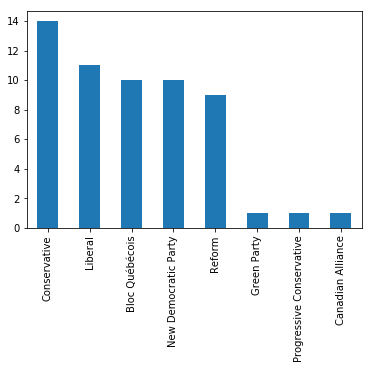

In [0]:
# plot the results
by_party.plot(kind="bar")

Of course, these results should be normalized (i.e. divided by the total number of speeches for each party). Assuming you are working with the Canadian data (the Great Depression example), we retrieved the total number of speeches by party from the [political mashup search interface](http://search.politicalmashup.nl) and saved it as dictionary below.

In [0]:
part2speechcount= {'Conservative':540251,
'Liberal':326107,
'New Democratic Party':211723,
'Bloc Québécois':113252,
'Reform':23014,
'Canadian Alliance':20209,
'Progressive Conservative':11281,
'Green Party':2162}

The code below converts the dictionary to a pandas DataFrame

In [0]:
p2s_df = pd.DataFrame.from_dict(part2speechcount,orient="index",columns=["count"])
p2s_df.head()

,count
Conservative,540251
Liberal,326107
New Democratic Party,211723
Bloc Québécois,113252
Reform,23014


To compute the relative number of speeches we first merge the two dataframes (i.e.  `by_party` with `p2s_df`). Pandas provides a `.merge()` method, which comes with many arguments. To inspect these arguments, run the cell below.

In [0]:
by_party_df = pd.DataFrame(by_party)
help(by_party_df.merge)

Help on method merge in module pandas.core.frame:

merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) method of pandas.core.frame.DataFrame instance
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          pre

We have to specify on which columns we want to merge the two data frames. In this case, we use the index column of both data frames (`left_index=True,right_index=True`)

In [0]:
df_merged = by_party_df.merge(p2s_df,left_index=True,right_index=True)
df_merged.columns = ['annotated','total_speeches']
df_merged.head()

,annotated,total_speeches
Conservative,14,540251
Liberal,11,326107
Bloc Québécois,10,113252
New Democratic Party,10,211723
Reform,9,23014


This step results in a new DataFrame with two columns: one which tracks the number of annotated speeches, the other one shows the total number of speeches. Now we can simply divide the two columns to compute the percentages.

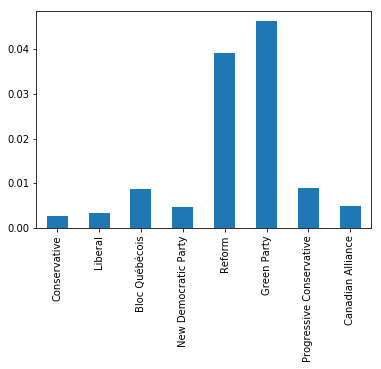

In [0]:
df_merged["percentage"] = (df_merged['annotated'] / df_merged['total_speeches']) * 100
df_merged.percentage.plot(rot=90,kind='bar')

A bit more complicated, but equally interesting is to study changes over time by plotting a timeline. Quite a lot happens in the code cell below, but the lines below unpack the procedure a little bit:

- line #1: change the data type (`dtype`) of the `date` column (so pandas reads these cells as dates, not strings)
- line #2: for each timestamp (one day effectively) count the number of speeches. This step produces a table with the number of speeches by day
- line #3: sum the results by year (i.e. sum the number of speeches by year)
- line #4: plot the results of the previous step

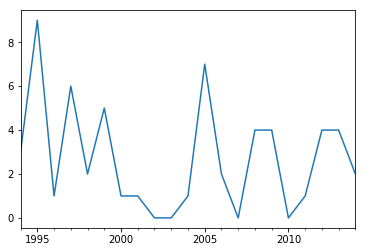

In [0]:
df.date = df.date.astype('datetime64') # convert the date column to datetime
by_date = df.date.value_counts() # count the number of speeches for each timestamp
by_year = by_date.resample("Y").sum() # group these counts by year and sum them
by_year.plot() # plot the results

## Refining selection by keyword search

Besides inspecting the annotations visually, we can zoom in on specific strings and segments. Below we show how you can query the data further,  selecting speeches that contain pre-specified strings. The lambda function `contains_string` returns True if a  text string (a sequence of character) has been found. Here we apply this function to the `text` column, to find speeches that contain the string "trade".

In [0]:
contains_string = lambda x,w: True if x.lower().find(w) >= 0 else False
df['contains_query'] = df['text'].apply(contains_string,w='trade')
df.head(3)

,categories,date,house,id,matching_links,party,role,speaker,text,topic,contains_query
0,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.36,False,Reform,mp,Ken Epp,"Mr. Speaker, I am honoured to stand in the Hou...",Government Orders,False
1,[],1999-03-09,None,ca.proc.d.19990309-880.3.1.49,False,Reform,mp,Diane Ablonczy,"Mr. Speaker, we are on the third and final rea...",Government Orders,False
2,[],2001-05-31,None,ca.proc.d.20010531-1893.2.1.9,False,Canadian Alliance,mp,Stockwell Day,"Madam Speaker, at the start of my comments I a...",Government Orders,False


To inspect the speeches that contain the string "trade" we can select the rows for which the value of `contains_query` is equal to `True` (df.contains_query==True). We save these rows in the `about_trade` variable. The `.shape` attribute tells us how many rows and columns the data frame contains after querying it by content.



In [0]:
about_trade = df[df.contains_query==True]
print(about_trade.shape)

(13, 11)


To read these speeches more in depth, you can use the `focus_on` function below. It allows you to formulate a regular expression as a query (instead of just a text string). For example, we can focus on the word "trade" by defining text boundaries (marked by `\b` (the word boundary character)) as shown in the example below:

In [0]:
import re
def focus_on(text, query, context):
  """Give n
  
  """
  text = ' '*context + text.lower() + ' '*context
  hits = []
  index = re.search(query,text,re.IGNORECASE)
  
  while hasattr(index,'start'):
    index = index.start()
    hits.append(text[index - context:index+len(query)+context])
    text = text[index+1:]
    index = re.search(query,text)
    
  return hits

In [0]:
text = about_trade.iloc[0].text
focus_on(text,r"\btrade\b",50)

['ipate in this debate on the agreement on internal trade which will come into effect on july 1. the agreement ',
 'federal and provincial governments about domestic trade barriers and impediments to a free and open internal ',
 'hey agreed to negotiate the agreement on internal trade the federal, provincial and territorial governments a',
 'tablishes a detailed rules framework for internal trade. it provides a consistent and defined process for pre',
 'its constitutional authority over interprovincial trade to open the internal market more forcibly. the nation',
 'nstitutional changes in the agreement on internal trade; rather, they were developing the basis for working t',
 'gislate or give life to the agreement on internal trade. the agreement has been signed by all its parties: th',
 'her in the interests of all canadians on internal trade issues. bill c-88 does what is necessary to ensure th']

Using regular expressions we can also add a wildcard (`*`) to match all variations on the word "goverm*". You can change the number of character shown before and after the query with the `context` argument.

In [0]:
text = about_trade.iloc[0].text
focus_on(text,r"\bgover[A-Za-z]*",context=25)

['possible for the federal government to comply fully with its oblig',
 'e federal and provincial governments about domestic trade barriers',
 ' the agreement, canadian governments recognize how well our domest',
 'ovincial and territorial governments all recognised and accepted t',
 'g the agreement canadian governments have demonstrated they are pr',
 "e possible and it is the government's intention to work to improve",
 'have also criticized the government for not exercising its constit',
 ' the different levels of government were agreed on in 1867. in the',
 'fully when all levels of government work co-operatively in the nat',
 'd certainly not by fiat. governments were not negotiating constitu',
 'osite have suggested the government has a hidden agenda in bill c-',
 ' the will of the federal government. that is purely and simply wro',
 'possible for the federal government to comply fully with its own o',
 'ork. bill c-88 gives the government specific authority to make cha',
 'ovin

In Pandas we can easily apply this function to all the rows in our data frame to find all speeches that match our pattern of interest, for example:

In [0]:
df['has_pattern'] = df.text.apply(focus_on,query=r"\bgover[A-Za-z]*",context=50)
df.head()

You can also search for multiple items at once with regular expressions, but we'll leave it up to you to find out how!

## Annotations

Currently, WideNet allows you to judge each speech as relevant or not. It is not possible, however, to further annotate your data, i.e. categorize texts according to a specified set of labels. To help you with this task, this Notebook offers a very simple annotation interface called ["Pigeon"](https://github.com/agermanidis/pigeon). Run the code below to install this library.

In [0]:
!pip install pigeon-jupyter

  Stored in directory: /root/.cache/pip/wheels/9c/e1/74/712f424efed3467a38edd654aedaad8e303e254a5a0fdbed49
Successfully built pigeon-jupyter


First import the annotation tool from the Pigeon library.

In [0]:
from pigeon import annotate

The `annotate` function requires two arguments `examples` and `options`.
- `examples` are the texts we want to annotate
- `options` are the labels

In [0]:
help(annotate)

Help on function annotate in module pigeon.annotate:

annotate(examples, options=None, shuffle=False, include_skip=True, display_fn=<function display at 0x7f9d63e5f620>)
    Build an interactive widget for annotating a list of input examples.
    
    Parameters
    ----------
    examples: list(any), list of items to annotate
    options: list(any) or tuple(start, end, [step]) or None
             if list: list of labels for binary classification task (Dropdown or Buttons)
             if tuple: range for regression task (IntSlider or FloatSlider)
             if None: arbitrary text input (TextArea)
    shuffle: bool, shuffle the examples before annotating
    include_skip: bool, include option to skip example while annotating
    display_fn: func, function for displaying an example to the user
    
    Returns
    -------
    annotations : list of tuples, list of annotated examples (example, label)



Below, we take the first ten speeches (if you want to annotate all documents remove `[:10]`), and print the first hundred characters of each speech. The labels are just placeholders, but feel free to change them to more meaningful items.

In [0]:
texts = [t[:100] for t in list(df.text)[:10]] # text to annotate
labels = ["about x", "about y","about z"] # labels

Run the code below to start annotating!

In [0]:
annotations = annotate(
  examples = texts,
  options = labels
)

'Mr. Speaker, one interesting thing about being a parliamentary secretary is that you get to stay up '

Now you can print the annotations.

In [0]:
print(annotations)

[('Mr. Speaker, I am honoured to stand in the House to represent the people of the Elk Island constitue', 'about z'), ('Mr. Speaker, we are on the third and final reading of an act that affects the equalization arrangeme', 'about y'), ('Madam Speaker, at the start of my comments I advise that I will be splitting my time today with the ', 'about x'), ('Mr. Speaker, I am pleased to participate in this debate on the agreement on internal trade which wil', 'about y'), ('Madam Speaker, the agreement on international trade came into effect on July 1. Bill C-88 is intende', 'about z'), ('moved: That, in the opinion of this House, the government, on this 60th anniversary of the "On to Ot', 'about y'), ("Mr. Speaker, I rise to speak to the motion of the hon. member for Regina-Qu'Appelle concerning the 1", 'about x')]


Or save them.

In [0]:
import pickle
pickle.dump(annotations,open('annotations.pckl','wb'))


## Congratulations! You finished the Notebook
Feel free to play with other examples and tweak the code where necessary!